In [688]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score

%matplotlib inline

### 1. Read the dataset and understand the features and target variable. 4 points


In [689]:

qlty_bankrupcy =  pd.read_csv("Qualitative_Bankruptcy_data.txt")

qlty_bankrupcy.head(5)

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Completitiveness,OperatingRisk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


# Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
##1. Industrial Risk: {P,A,N}
##2. Management Risk: {P,A,N}
##3. Financial Flexibility: {P,A,N}
##4. Credibility: {P,A,N}
##5. Competitiveness: {P,A,N}
##6. Operating Risk: {P,A,N}
##7. Class: {B,NB}

In [690]:
qlty_bankrupcy.info()
#qlty_bankrupcy.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IndustrialRisk          250 non-null object
ManagementRisk          250 non-null object
FinancialFlexibility    250 non-null object
Credibility             250 non-null object
Completitiveness        250 non-null object
OperatingRisk           250 non-null object
Class                   250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [691]:
print(qlty_bankrupcy["Class"].value_counts())
print(" OBSERVATION - The dataset has distribution of 3:4 ratio across Bankrupcy and Non-Bankrupcy")

print("OBSERVATION - The value counts across the features show that some features are equally distributed and some features are distributed more on the NEGATIVE attribute")

print(qlty_bankrupcy["IndustrialRisk"].value_counts())
print(qlty_bankrupcy["ManagementRisk"].value_counts())
print(qlty_bankrupcy["FinancialFlexibility"].value_counts())
print(qlty_bankrupcy["Credibility"].value_counts())
print(qlty_bankrupcy["Completitiveness"].value_counts())
print(qlty_bankrupcy["OperatingRisk"].value_counts())

NB    143
B     107
Name: Class, dtype: int64
 OBSERVATION - The dataset has distribution of 3:4 ratio across Bankrupcy and Non-Bankrupcy
OBSERVATION - The value counts across the features show that some features are equally distributed and some features are distributed more on the NEGATIVE attribute
N    89
A    81
P    80
Name: IndustrialRisk, dtype: int64
N    119
A     69
P     62
Name: ManagementRisk, dtype: int64
N    119
A     74
P     57
Name: FinancialFlexibility, dtype: int64
N    94
P    79
A    77
Name: Credibility, dtype: int64
N    103
P     91
A     56
Name: Completitiveness, dtype: int64
N    114
P     79
A     57
Name: OperatingRisk, dtype: int64


In [692]:
y = qlty_bankrupcy['Class']
qlty_bankrupcy = qlty_bankrupcy.drop('Class',axis=1)

## 2. Encode independent features. 4 points

In [693]:
# using get-dummies to do one-hot encoding. 
# The label encoding is not required here as data is already binned. 

from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder() 

#acro = P=Positive,A-Average,N-negative

qlty_bankrupcy = pd.get_dummies(qlty_bankrupcy)

qlty_bankrupcy.head(5)

,IndustrialRisk_A,IndustrialRisk_N,IndustrialRisk_P,ManagementRisk_A,ManagementRisk_N,ManagementRisk_P,FinancialFlexibility_A,FinancialFlexibility_N,FinancialFlexibility_P,Credibility_A,Credibility_N,Credibility_P,Completitiveness_A,Completitiveness_N,Completitiveness_P,OperatingRisk_A,OperatingRisk_N,OperatingRisk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [694]:
#Encoding the categorical values
# Label encoding is not required as the data is already binned.

#le = LabelEncoder()

#qlty_bankrupcy["IndustrialRisk"] = le.fit_transform(qlty_bankrupcy["IndustrialRisk"])
#qlty_bankrupcy["ManagementRisk"] = le.fit_transform(qlty_bankrupcy["ManagementRisk"])
#qlty_bankrupcy["FinancialFlexibility"] = le.fit_transform(qlty_bankrupcy["FinancialFlexibility"])
#qlty_bankrupcy["Credibility"] = le.fit_transform(qlty_bankrupcy["Credibility"])
#qlty_bankrupcy["Completitiveness"] = le.fit_transform(qlty_bankrupcy["Completitiveness"])
#qlty_bankrupcy["OperatingRisk"] = le.fit_transform(qlty_bankrupcy["OperatingRisk"])


In [695]:
# Adding back the Class value to the dataframe for arriving at the pair plot with HUE.

qlty_bankrupcy["Class"] = y
qlty_bankrupcy.head(5)

,IndustrialRisk_A,IndustrialRisk_N,IndustrialRisk_P,ManagementRisk_A,ManagementRisk_N,ManagementRisk_P,FinancialFlexibility_A,FinancialFlexibility_N,FinancialFlexibility_P,Credibility_A,Credibility_N,Credibility_P,Completitiveness_A,Completitiveness_N,Completitiveness_P,OperatingRisk_A,OperatingRisk_N,OperatingRisk_P,Class
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,NB
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,NB
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NB
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,NB
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,NB


DATA ANALYSIS


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


The chart on the diagonal lists the potential no of clusters to expect from this.


<Figure size 1296x1296 with 0 Axes>

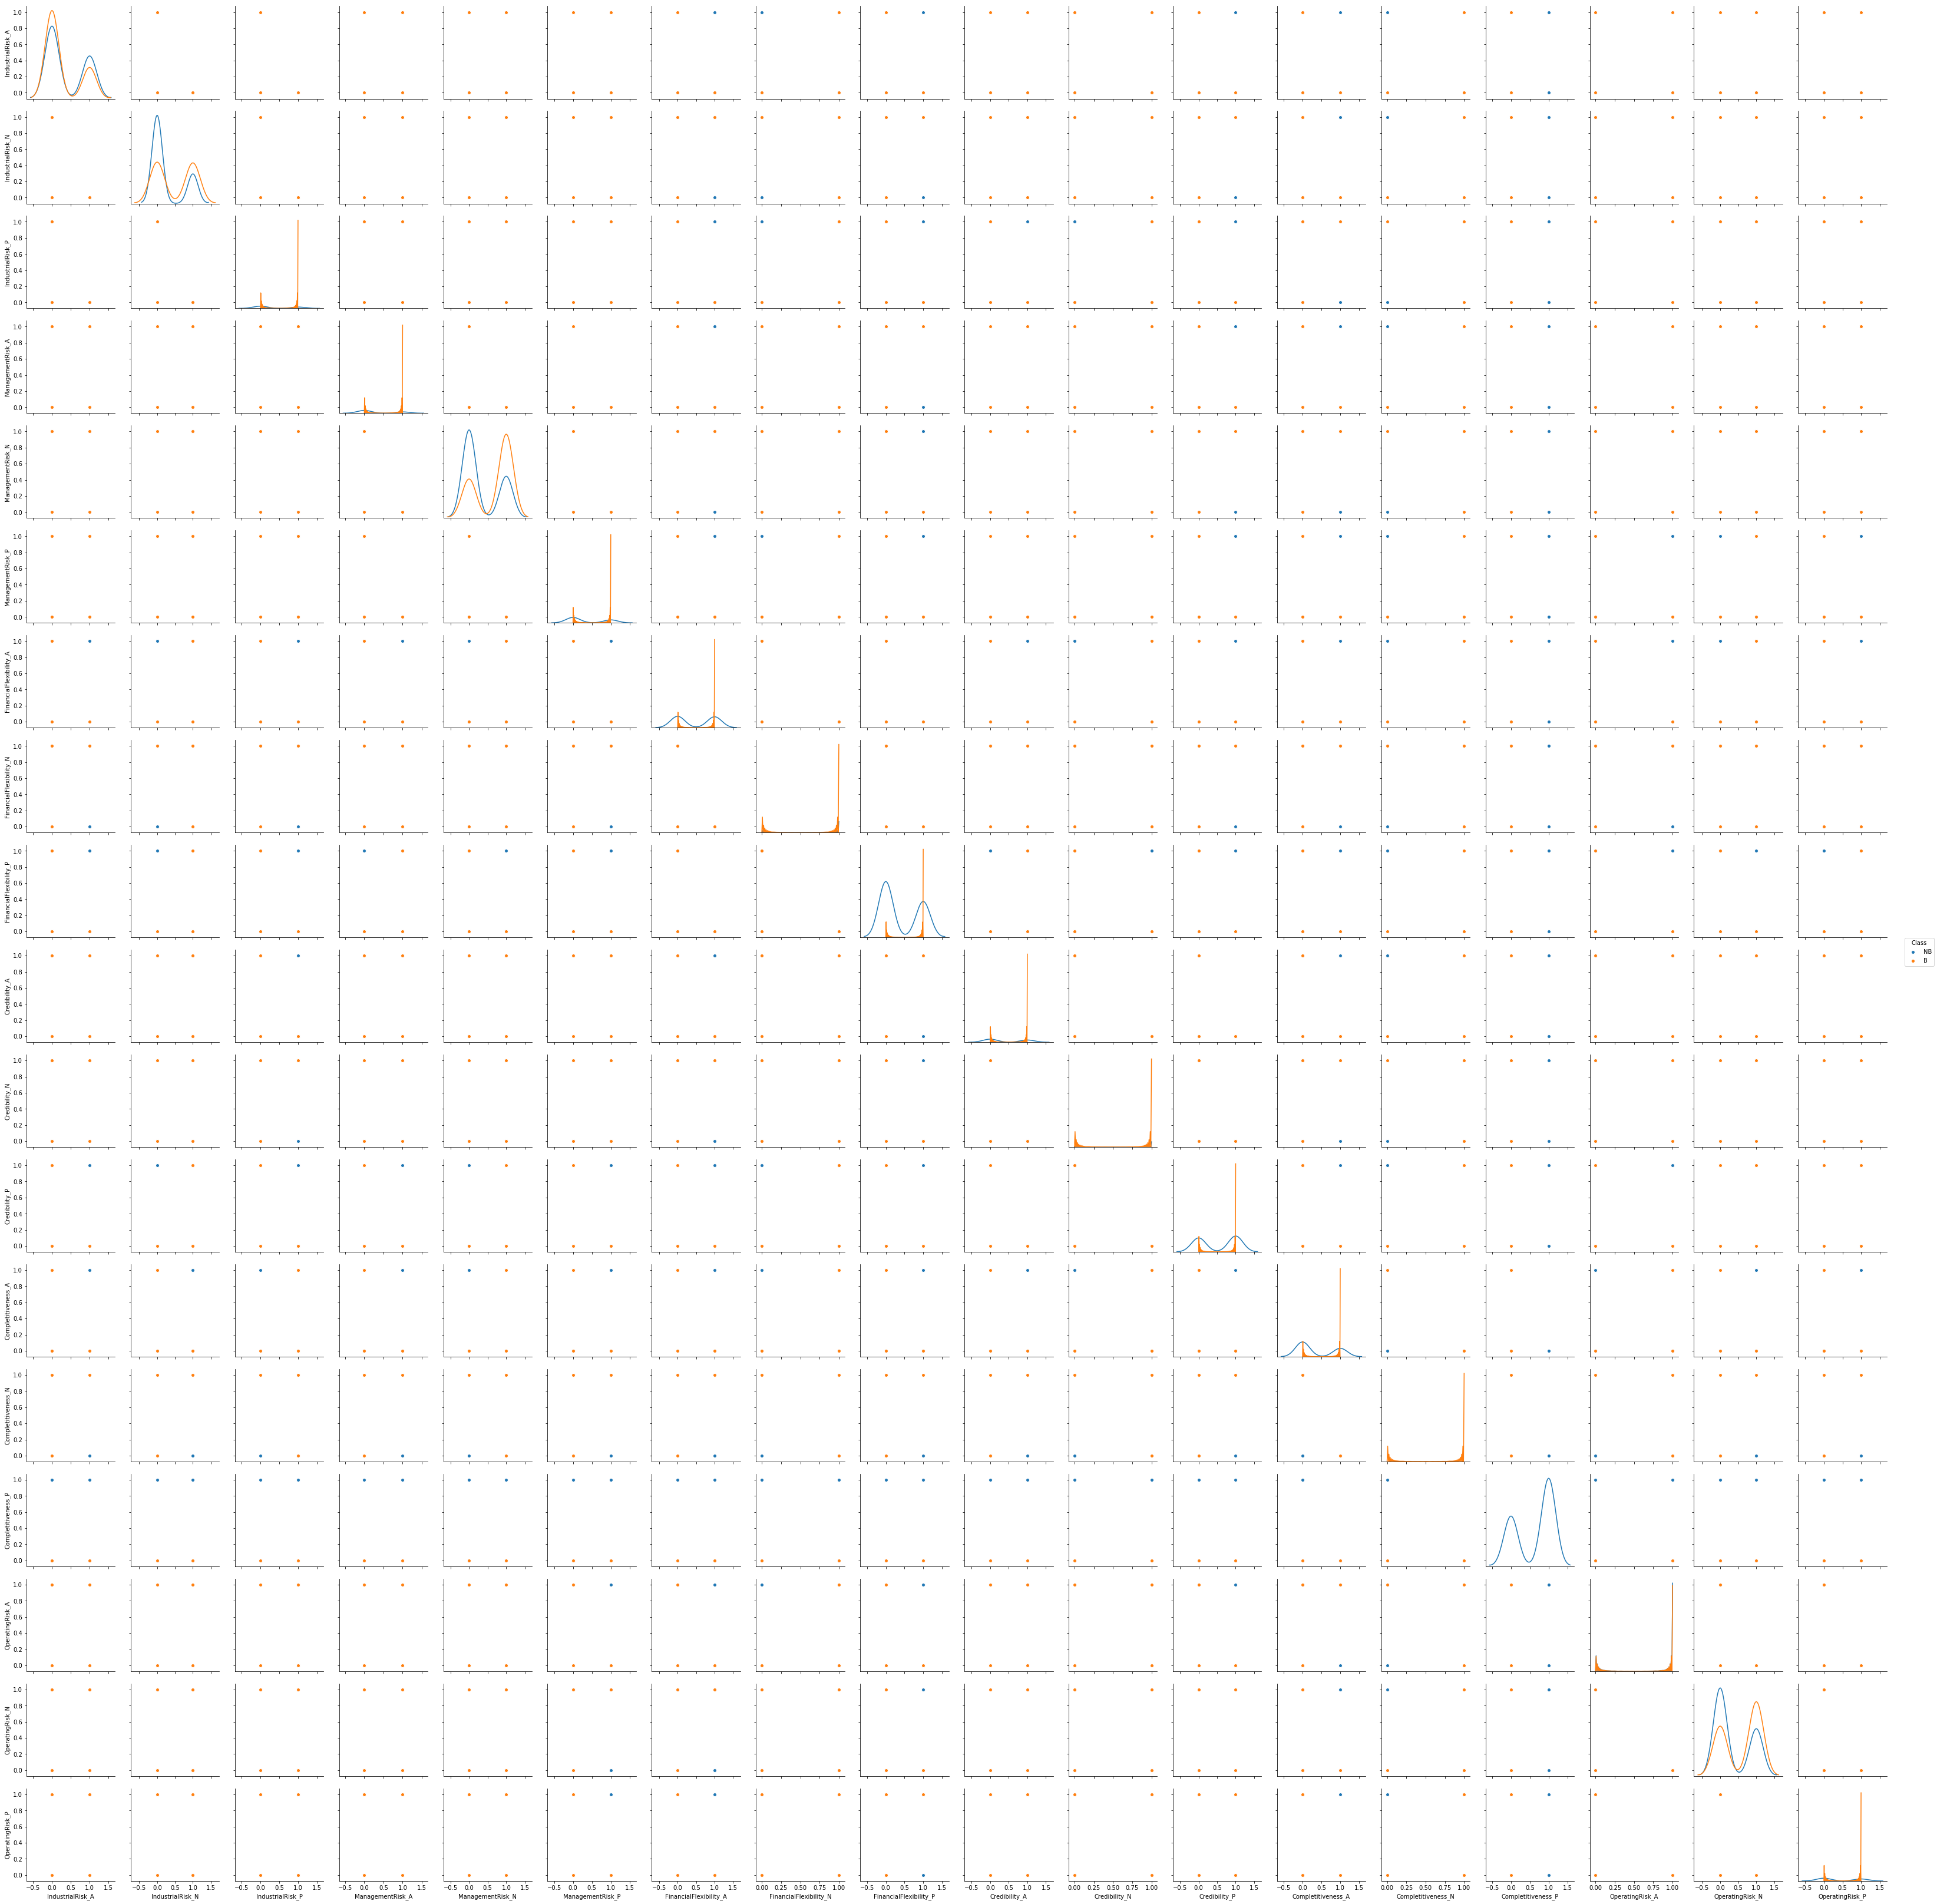

In [696]:
print("DATA ANALYSIS")
mplot.figure(figsize=(18 , 18))

sns.pairplot(qlty_bankrupcy,kind="scatter", diag_kind='kde', hue = "Class")

print("The chart on the diagonal lists the potential no of clusters to expect from this.")

DATA ANALYSIS


<Figure size 1296x1296 with 0 Axes>

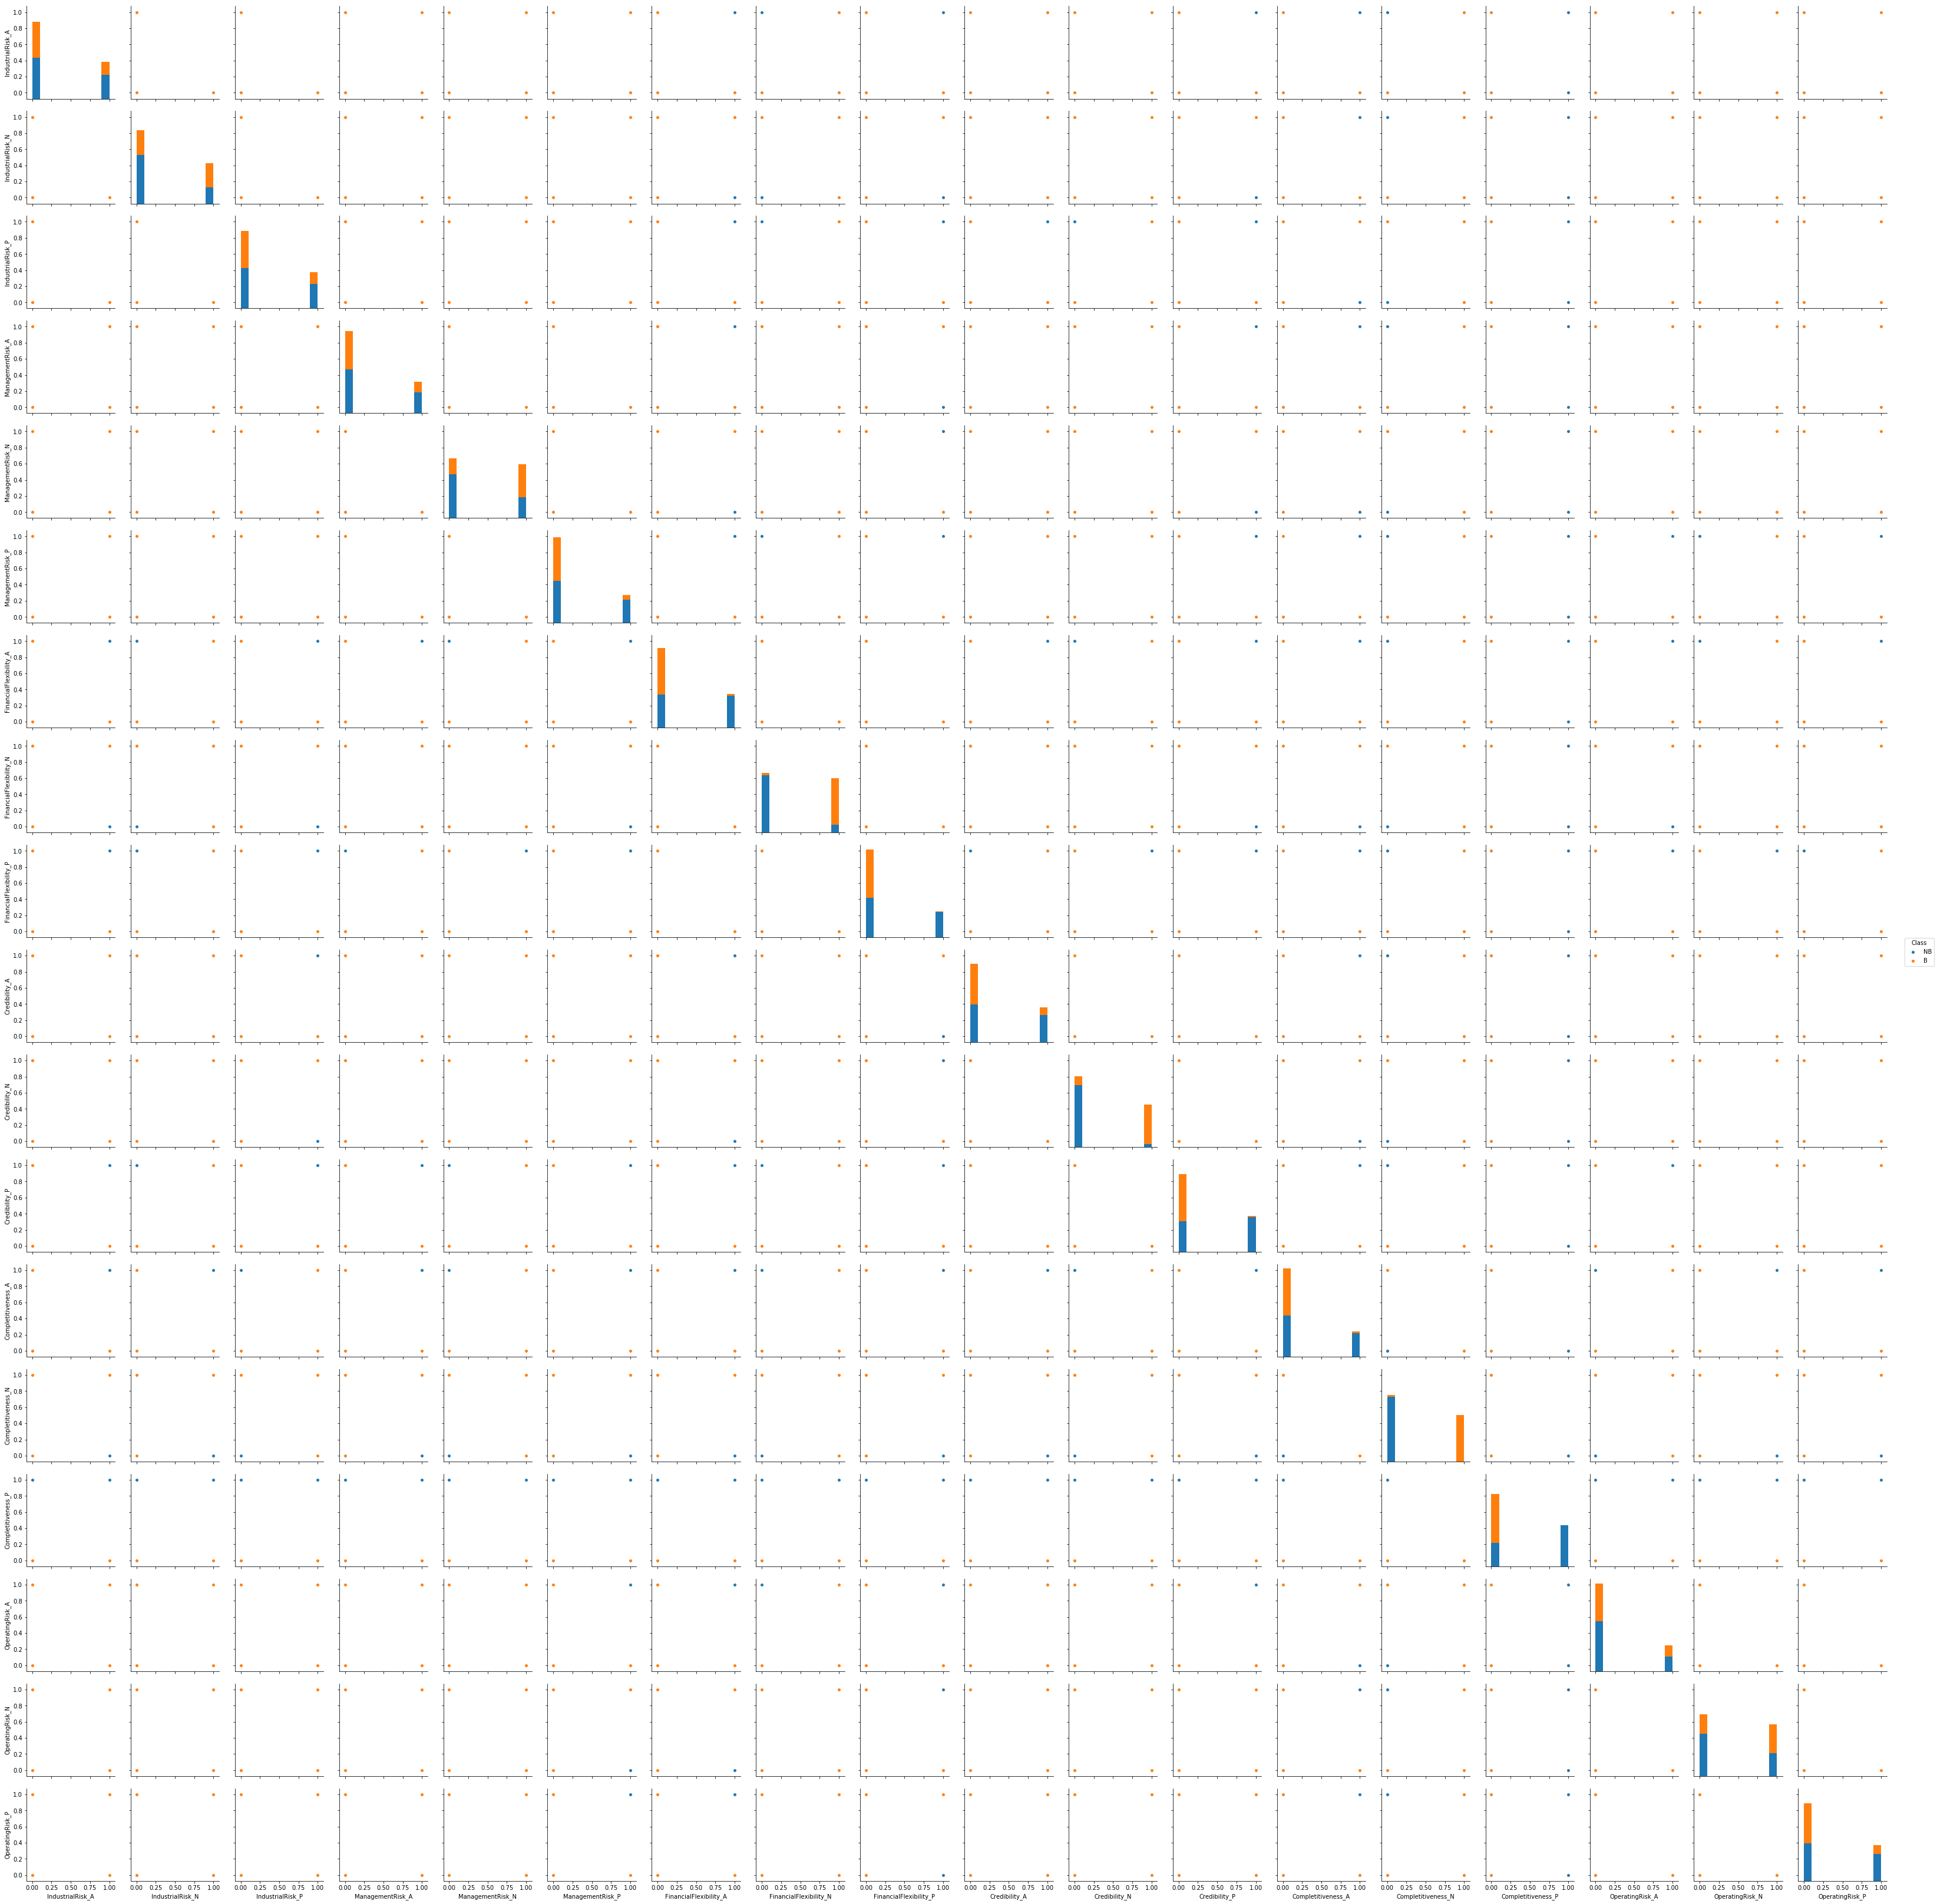

In [697]:
print("DATA ANALYSIS")
mplot.figure(figsize=(18 , 18))
sns.pairplot(qlty_bankrupcy,kind="scatter", diag_kind='hist', hue = "Class")

DATA ANALYSIS - OBSERVATIONS
OBSERVATION - Completiveness(N) - It has some strong negative correlation to some of the features.
OBSERVATION - Credibility(N) - It has some strong negative correlation to some of the features.
OBSERVATION - Financial Flexibility(N) - It has some strong negative correlation to some of the features.
OBSERVATION - Credibility(N) - It has some strong positive correlation to some of the features.
OBSERVATION - Financial Flexibility(N) - It has some strong positive correlation to some of the features.
OBSERVATION - Completiveness (N) - It has some strong positive correlation to some of the features.
OBSERVATION - all the 3 above mentioned Features have exhibited both Positive and Negative correlation with some of the other features


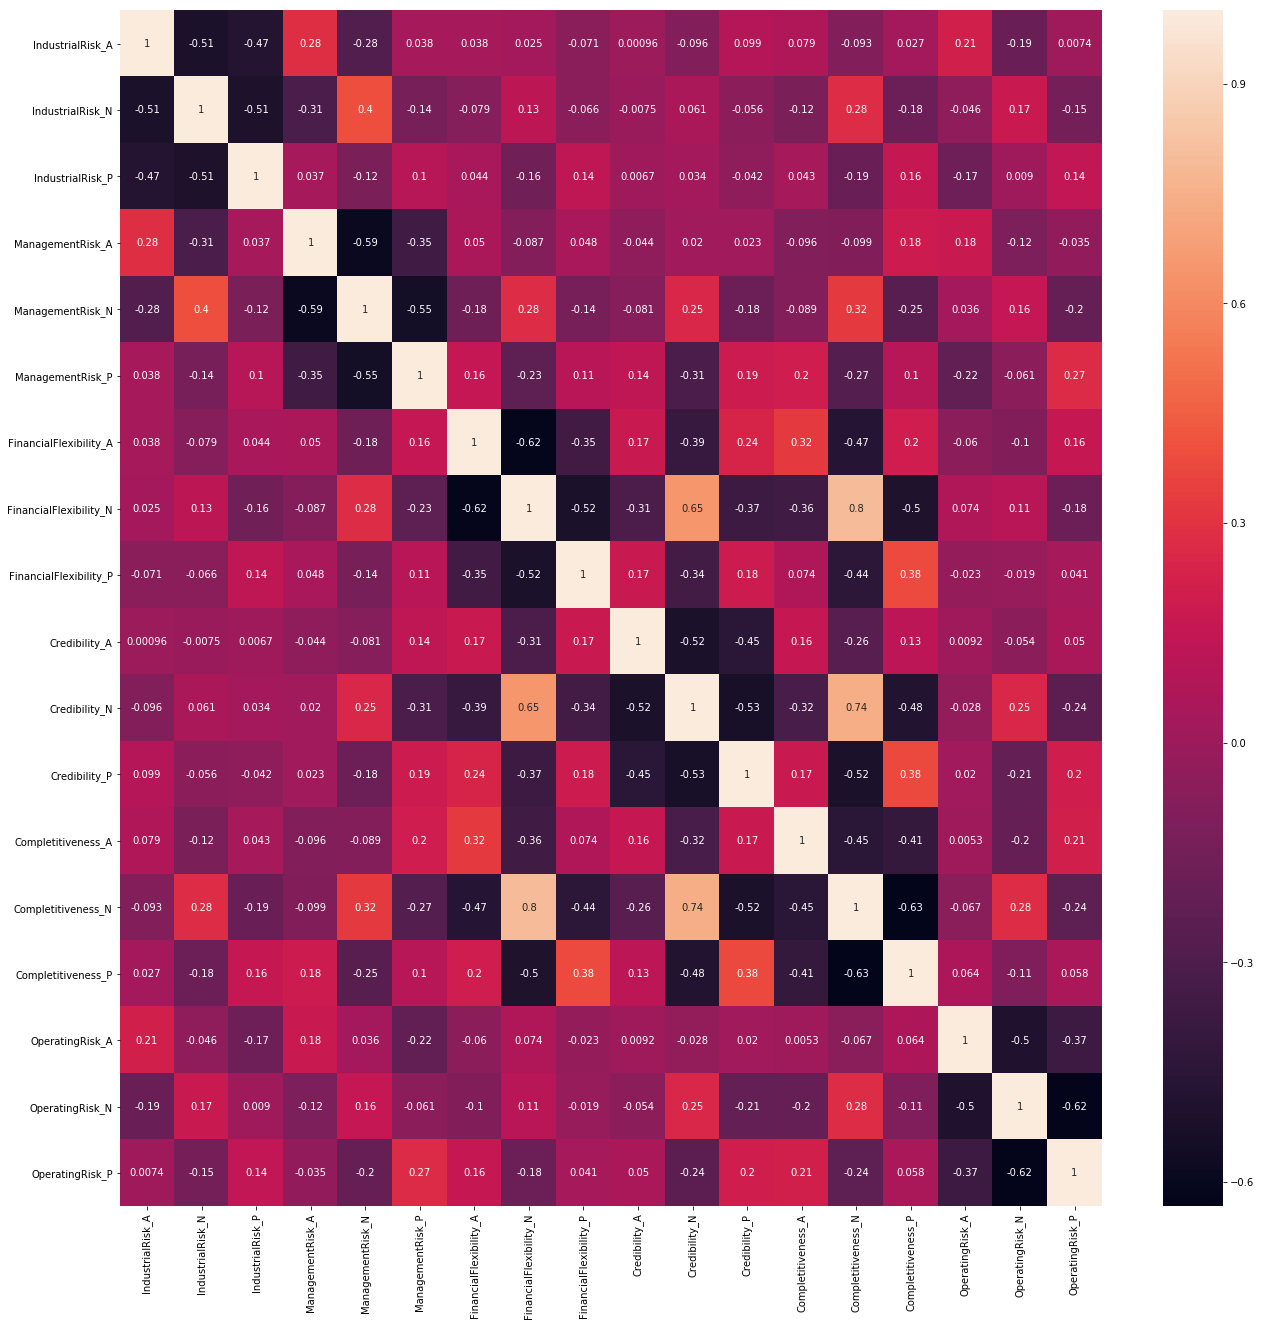

In [698]:
print("DATA ANALYSIS - OBSERVATIONS")
mplot.figure(figsize=(22 , 22))
qlty_bankrupcy_corr = qlty_bankrupcy.corr()
sns.heatmap(qlty_bankrupcy_corr, xticklabels = qlty_bankrupcy_corr.columns.values, yticklabels = qlty_bankrupcy_corr.columns.values, annot = True);

## Positive Correlation (Some strong)
print("OBSERVATION - Completiveness(N) - It has some strong negative correlation to some of the features.")
print("OBSERVATION - Credibility(N) - It has some strong negative correlation to some of the features.")
print("OBSERVATION - Financial Flexibility(N) - It has some strong negative correlation to some of the features.")

## Negative Correlation (Some strong)
print("OBSERVATION - Credibility(N) - It has some strong positive correlation to some of the features.")
print("OBSERVATION - Financial Flexibility(N) - It has some strong positive correlation to some of the features.")
print("OBSERVATION - Completiveness (N) - It has some strong positive correlation to some of the features.")

## Mixed Correlation 
print("OBSERVATION - all the 3 above mentioned Features have exhibited both Positive and Negative correlation with some of the other features")


## 3. Separate the dependant variable from the rest of the train data 2 point

In [699]:
X = qlty_bankrupcy.drop('Class',axis=1)
X.head(5)

,IndustrialRisk_A,IndustrialRisk_N,IndustrialRisk_P,ManagementRisk_A,ManagementRisk_N,ManagementRisk_P,FinancialFlexibility_A,FinancialFlexibility_N,FinancialFlexibility_P,Credibility_A,Credibility_N,Credibility_P,Completitiveness_A,Completitiveness_N,Completitiveness_P,OperatingRisk_A,OperatingRisk_N,OperatingRisk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [700]:
y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

## 4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [701]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

## 5. Apply PCA on the independent features of train data. 2 point

In [702]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.26965196 0.12155751 0.09882419]
[[-0.08095603  0.17154919 -0.09059316 -0.08384274  0.25893641 -0.17509367
  -0.23564537  0.40783702 -0.17219165 -0.13939022  0.38647097 -0.24708075
  -0.15188769  0.44161486 -0.28972716 -0.00689186  0.18732049 -0.18042863]
 [ 0.46678573 -0.42770105 -0.03908468  0.42268236 -0.37154036 -0.051142
  -0.10185401  0.22259482 -0.12074081 -0.17685958  0.18144402 -0.00458444
  -0.06543622  0.09656087 -0.03112465  0.21735407 -0.27325991  0.05590585]
 [-0.1923168  -0.24774108  0.44005788  0.21991957 -0.20837798 -0.01154158
  -0.15642277 -0.07167379  0.22809656 -0.02233491  0.13875573 -0.11642082
  -0.30065198 -0.01236665  0.31301863 -0.19265203  0.45474753 -0.2620955 ]]


In [703]:
# Identify Eigen Values and Eigen Vectors 

print("Identify eigen values and eigen vector")
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Identify eigen values and eigen vector
Covariance Matrix 
%s [[ 2.19903614e-01 -1.15807229e-01 -1.04096386e-01  5.88112450e-02
  -6.64899598e-02  7.67871486e-03  8.12851406e-03  5.79919679e-03
  -1.39277108e-02  2.08835341e-04 -2.19116466e-02  2.17028112e-02
   1.54859438e-02 -2.15742972e-02  6.08835341e-03  4.22971888e-02
  -4.39196787e-02  1.62248996e-03]
 [-1.15807229e-01  2.30184739e-01 -1.14377510e-01 -6.65220884e-02
   9.49236948e-02 -2.84016064e-02 -1.74457831e-02  3.06666667e-02
  -1.32208835e-02 -1.65461847e-03  1.42008032e-02 -1.25461847e-02
  -2.38393574e-02  6.55903614e-02 -4.17510040e-02 -9.20481928e-03
   4.18313253e-02 -3.26265060e-02]
 [-1.04096386e-01 -1.14377510e-01  2.18473896e-01  7.71084337e-03
  -2.84337349e-02  2.07228916e-02  9.31726908e-03 -3.64658635e-02
   2.71485944e-02  1.44578313e-03  7.71084337e-03 -9.15662651e-03
   8.35341365e-03 -4.40160643e-02  3.56626506e-02 -3.30923695e-02
   2.08835341e-03  3.10040161e-02]
 [ 5.88112450e-02 -6.65220884e-02  7.71084

In [704]:
print("Find variance and cumulative variance by each eigen vector")
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Find variance and cumulative variance by each eigen vector
Cumulative Variance Explained [ 26.96519556  39.12094662  49.0033659   58.459997    66.75854678
  74.29974402  80.97482069  86.68685424  91.59997325  96.07971808
  98.69896549 100.         100.         100.         100.
 100.         100.         100.        ]


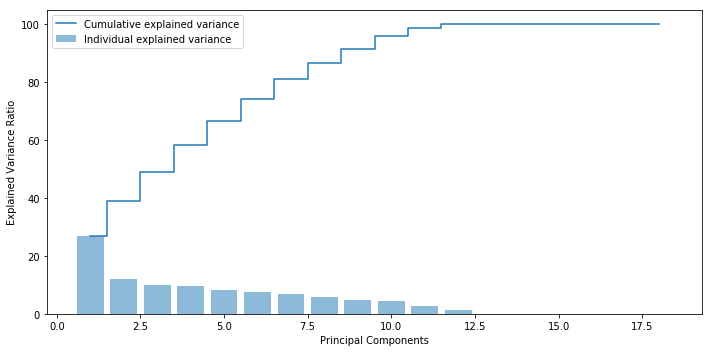

Observation - The 10 principal components covers between 95-98 % of the mathematical space.
Observation - The rest of the principal components can be dropped as part of dimensionality reduction process.


In [705]:
# Ploting 
mplot.figure(figsize=(10 , 5))
mplot.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
mplot.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
mplot.ylabel('Explained Variance Ratio')
mplot.xlabel('Principal Components')
mplot.legend(loc = 'best')
mplot.tight_layout()
mplot.show()

print("Observation - The 10 principal components covers between 95-98 % of the mathematical space.")
print("Observation - The rest of the principal components can be dropped as part of dimensionality reduction process.")

## 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points

In [706]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-

cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_sil_scores = []
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,971.792000
1,2,737.196131
2,3,665.068758
3,4,608.216133
4,5,565.676886
5,6,539.623557
6,7,514.203733
7,8,487.671732
8,9,453.183607


Observation - The Elbow plot shows that the Cluster = 2 it displays the sharp elbow bend. Thus making it the optimum no of clusters to consider.


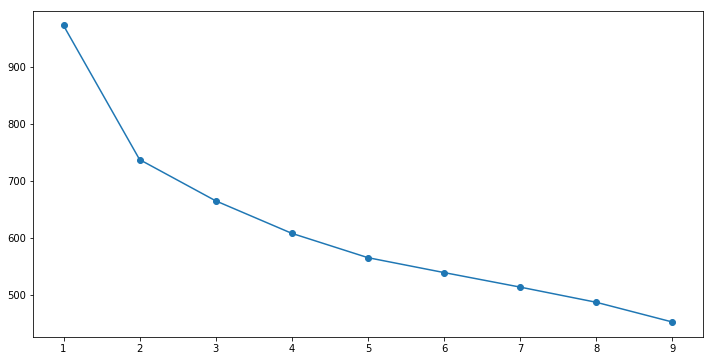

In [707]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
print("Observation - The Elbow plot shows that the Cluster = 2 it displays the sharp elbow bend. Thus making it the optimum no of clusters to consider.")

## 7. Transform the data using PCA ( select optimum number of PCs). 4 points

In [708]:
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.26965196 0.12155751]
[[-0.08095603  0.17154919 -0.09059316 -0.08384274  0.25893641 -0.17509367
  -0.23564537  0.40783702 -0.17219165 -0.13939022  0.38647097 -0.24708075
  -0.15188769  0.44161486 -0.28972716 -0.00689186  0.18732049 -0.18042863]
 [ 0.46678573 -0.42770105 -0.03908468  0.42268236 -0.37154036 -0.051142
  -0.10185401  0.22259482 -0.12074081 -0.17685958  0.18144402 -0.00458444
  -0.06543622  0.09656087 -0.03112465  0.21735407 -0.27325991  0.05590585]]


In [709]:
from sklearn.decomposition import PCA

In [710]:
X_centered = X - X.mean(axis=0)


In [711]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [712]:
X_pca = pca.transform(X_centered)
X_pca.shape

(250, 2)

In [713]:
pca = PCA().fit(X_centered)

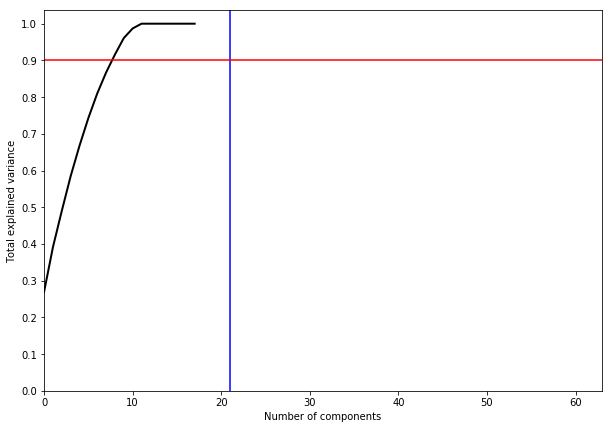

In [714]:
# Visualize Variance by new Dimensions

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

### 8. Apply KMeans algorithm on the above transformed data. 6 points
### 9. Select optimal number of clusters and form clusters out of the train data. 10 points
### 10. Create a new column in the train data and populate it with the cluster labels. 4 points
### 11. Transform the test data using the same PCA object that was fit on the train data. 4 points
### 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points

In [715]:
X_centered.head(5)

,IndustrialRisk_A,IndustrialRisk_N,IndustrialRisk_P,ManagementRisk_A,ManagementRisk_N,ManagementRisk_P,FinancialFlexibility_A,FinancialFlexibility_N,FinancialFlexibility_P,Credibility_A,Credibility_N,Credibility_P,Completitiveness_A,Completitiveness_N,Completitiveness_P,OperatingRisk_A,OperatingRisk_N,OperatingRisk_P
0,-0.324,-0.356,0.68,-0.276,-0.476,0.752,0.704,-0.476,-0.228,0.692,-0.376,-0.316,0.776,-0.412,-0.364,-0.228,-0.456,0.684
1,-0.324,0.644,-0.32,-0.276,0.524,-0.248,0.704,-0.476,-0.228,0.692,-0.376,-0.316,0.776,-0.412,-0.364,-0.228,0.544,-0.316
2,0.676,-0.356,-0.32,0.724,-0.476,-0.248,0.704,-0.476,-0.228,0.692,-0.376,-0.316,0.776,-0.412,-0.364,0.772,-0.456,-0.316
3,-0.324,-0.356,0.68,-0.276,-0.476,0.752,-0.296,-0.476,0.772,-0.308,-0.376,0.684,-0.224,-0.412,0.636,-0.228,-0.456,0.684
4,-0.324,0.644,-0.32,-0.276,0.524,-0.248,-0.296,-0.476,0.772,-0.308,-0.376,0.684,-0.224,-0.412,0.636,-0.228,0.544,-0.316


In [716]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [717]:
# Number of clusters
kmeans = KMeans(n_clusters=2)

# Fitting the input data
kmeans = kmeans.fit(X_centered)

# Getting the cluster labels
labels = kmeans.predict(X_centered)

In [718]:
centroid_df = pd.DataFrame(centroids, columns = list(X_centered) )

In [719]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [720]:
# Joining the label dataframe with the original data frame to create bankrupcy_df_labeled. Note: it could be appended to original dataframe
X_centered_labeled = X_centered.join(df_labels)

In [721]:
print(X_centered_labeled['labels'].value_counts())
print(X_centered_labeled.count())
#print(X_centered.count())

1    143
0    107
Name: labels, dtype: int64
IndustrialRisk_A          250
IndustrialRisk_N          250
IndustrialRisk_P          250
ManagementRisk_A          250
ManagementRisk_N          250
ManagementRisk_P          250
FinancialFlexibility_A    250
FinancialFlexibility_N    250
FinancialFlexibility_P    250
Credibility_A             250
Credibility_N             250
Credibility_P             250
Completitiveness_A        250
Completitiveness_N        250
Completitiveness_P        250
OperatingRisk_A           250
OperatingRisk_N           250
OperatingRisk_P           250
labels                    250
dtype: int64


In [722]:
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
#print("sklearn")
print(centroids) # From sci-kit learn
print(labels)
#print(kmeans.labels_)

Centroid values
[[-0.05297196  0.12998131 -0.07700935 -0.07039252  0.21558879 -0.14519626
  -0.25861682  0.48661682 -0.228      -0.15846729  0.44642991 -0.28796262
  -0.18661682  0.54127103 -0.35465421 -0.00370093  0.14213084 -0.13842991]
 [ 0.03963636 -0.09725874  0.05762238  0.05267133 -0.16131469  0.10864336
   0.19351049 -0.36411189  0.1706014   0.11857343 -0.33404196  0.21546853
   0.13963636 -0.40500699  0.26537063  0.00276923 -0.10634965  0.10358042]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [723]:
print("Creating a dendogram")

Creating a dendogram


In [724]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [725]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [726]:
model.fit(X_centered_labeled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

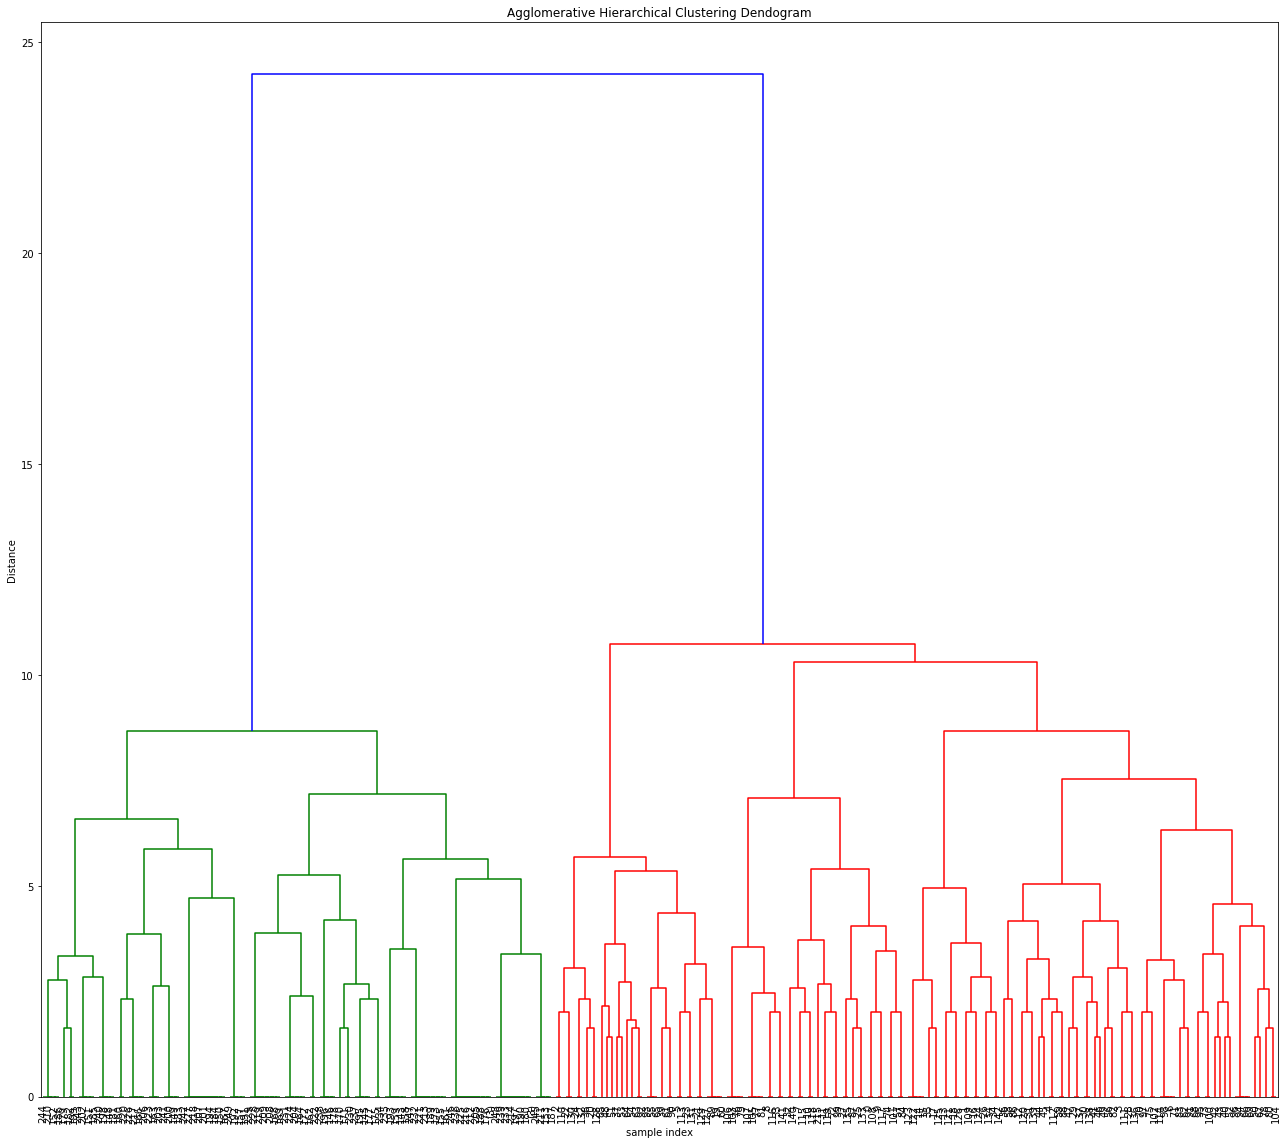

In [727]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_centered_labeled, 'ward')
linkage(X_centered_labeled , method='single', metric='euclidean')

dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

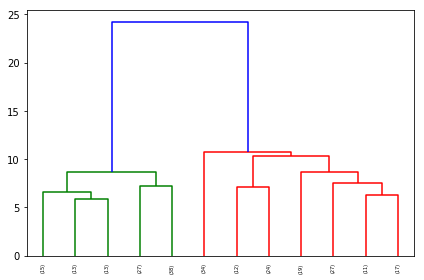

In [728]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=5,truncate_mode='lastp')
plt.tight_layout()

## Apply any classification model (example: Logistic Regression) on train dataset and predict target for test dataset. 3 points

In [729]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=.8, random_state=1) # stratify=y,

In [749]:
print("Building a model using a Classification model (Decision Tree)")

DTmodel = DecisionTreeClassifier(max_depth=5, random_state=1)
DTmodel.fit(X_train, y_train)
DTmodel.fit(X_test, y_test)
X_pred_dt = DTmodel.predict(X_test)

Building a model using a Classification model (Decision Tree)


In [750]:
print("The Train score with Decision Tree algo is " , DTmodel.score(X_train, y_train))
print("The Test score with Decision Tree algo is " , DTmodel.score(X_test, y_test))

The Train score with Decision Tree algo is  1.0
The Test score with Decision Tree algo is  1.0


In [751]:
from sklearn.metrics import confusion_matrix

labels = ['B', 'NB']
cm = confusion_matrix(y_test, X_pred_dt, labels)
cm

array([[ 89,   0],
       [  0, 111]], dtype=int64)

### 13. Apply SVC model on train dataset and predict target for test dataset. 6 points

In [752]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [753]:
#Create a svm Classifier with LINEAR Kernel
svm_linear = svm.SVC(kernel='linear') 

svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [754]:
y_pred_linear = svm_linear.predict(X_test)
print("SVM LINEAR Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))

SVM LINEAR Kernel Accuracy: 0.995


In [755]:
#kernels = [‘linear’, ‘rbf’, ‘poly’]

#Create a svm Classifier with RBF Kernel
svm_rbf = svm.SVC(kernel='rbf') 
svm_rbf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [756]:
y_pred_rbf = svm_rbf.predict(X_test)
print("SVM RBF Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

SVM RBF Kernel Accuracy: 0.995


In [757]:
#kernels = [‘linear’, ‘rbf’, ‘poly’]

#Create a svm Classifier with POLY Kernel
svm_poly = svm.SVC(kernel='poly') 

svm_poly.fit(X_train, y_train)
y_pred_ploy = svm_poly.predict(X_test)
print("SVM POLY Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_ploy))

SVM POLY Kernel Accuracy: 0.555


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [758]:
print("OBSERVATION - The Accuracy of the SVM(SVC) with the LINEAR and RBF kernels are close to 100% accuracy.")
print("OBSERVATION - Both LINEAR and RBF Kernels of SVM-SVC work equally well.")

OBSERVATION - The Accuracy of the SVM(SVC) with the LINEAR and RBF kernels are close to 100% accuracy.
OBSERVATION - Both LINEAR and RBF Kernels of SVM-SVC work equally well.


## 14. Check accuracy and confusion matrix. 2 point

In [759]:
from sklearn.metrics import confusion_matrix

print("Building Classifier (Decision Tree) using PCA features")

model = DecisionTreeClassifier(max_depth=6, random_state=1)
model.fit(pca.transform(X_train), y_train)


Building Classifier (Decision Tree) using PCA features


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [760]:
model.score(pca.transform(X_test), y_test)

0.995

In [761]:
y_pred_linear

array(['NB', 'B', 'B', 'B', 'NB', 'B', 'NB', 'B', 'B', 'NB', 'B', 'B',
       'NB', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B',
       'NB', 'NB', 'B', 'B', 'NB', 'B', 'B', 'NB', 'NB', 'B', 'B', 'B',
       'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB',
       'NB', 'NB', 'NB', 'B', 'B', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB',
       'NB', 'B', 'B', 'B', 'B', 'NB', 'B', 'NB', 'B', 'NB', 'NB', 'NB',
       'B', 'B', 'B', 'B', 'NB', 'NB', 'B', 'B', 'B', 'NB', 'NB', 'B',
       'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB',
       'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'B',
       'NB', 'B', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'B',
       'NB', 'B', 'NB', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'NB', 'NB',
       'B', 'B', 'NB', 'B', 'B', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'B',
       'B', 'NB', 'B', 'B', 'B', 'NB', 'B', 'NB', 'B', 'B', 'NB', 'NB',
       'NB', 'B', 'NB', 'NB', 'NB', 'B', 'NB', 'B', 'B', '

In [762]:
from sklearn.metrics import confusion_matrix

labels = ['B', 'NB']
cm = confusion_matrix(y_test, y_pred_linear, labels)

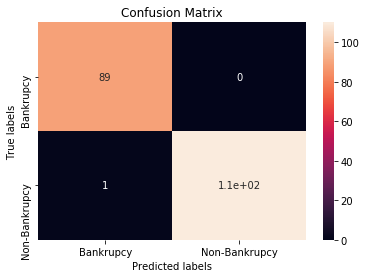

In [763]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bankrupcy', 'Non-Bankrupcy']); ax.yaxis.set_ticklabels(['Bankrupcy', 'Non-Bankrupcy']);

In [764]:
print("Checking the silhouette_score")

Checking the silhouette_score


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.23234275987578


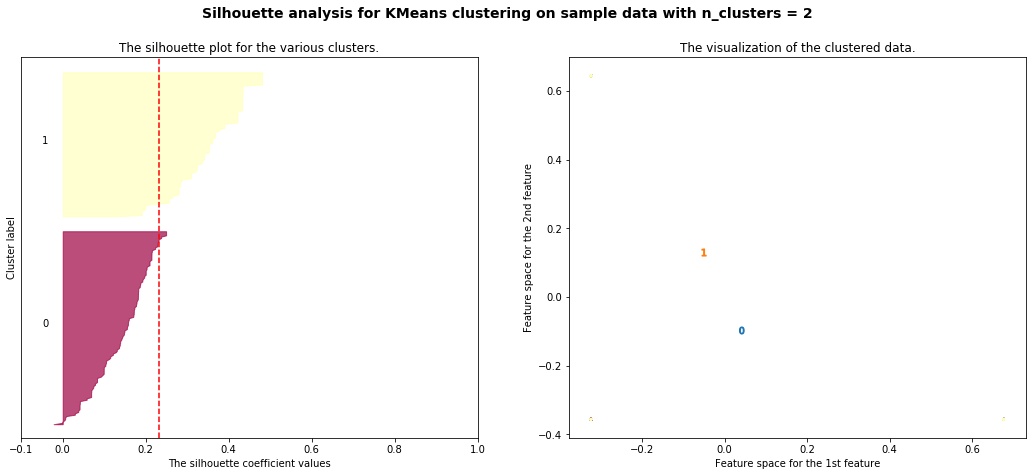

For n_clusters = 3 The average silhouette_score is : 0.22772788539127087


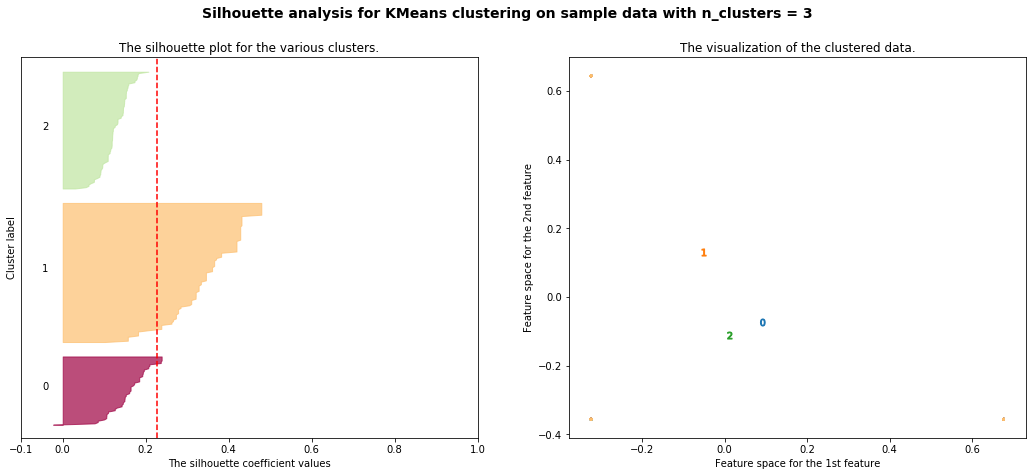

For n_clusters = 4 The average silhouette_score is : 0.22616698919145042


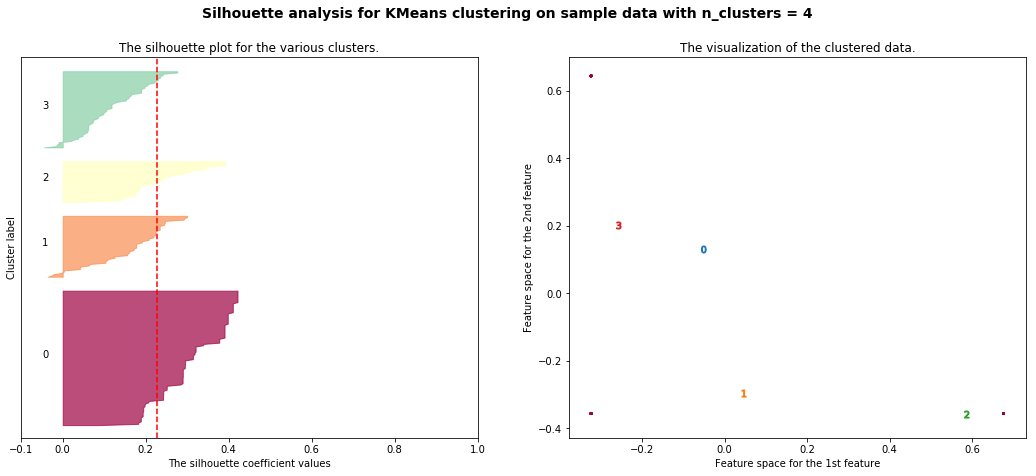

For n_clusters = 5 The average silhouette_score is : 0.18715907275847918


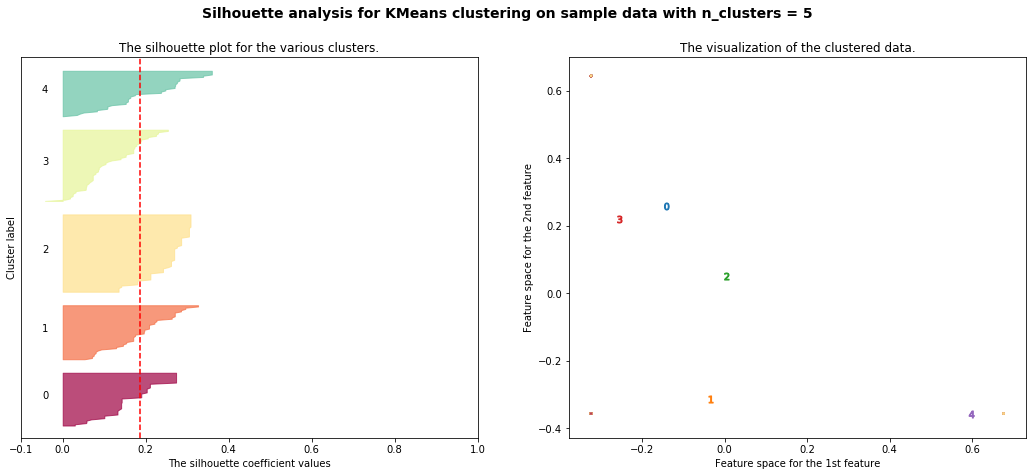

For n_clusters = 6 The average silhouette_score is : 0.1802629757402121


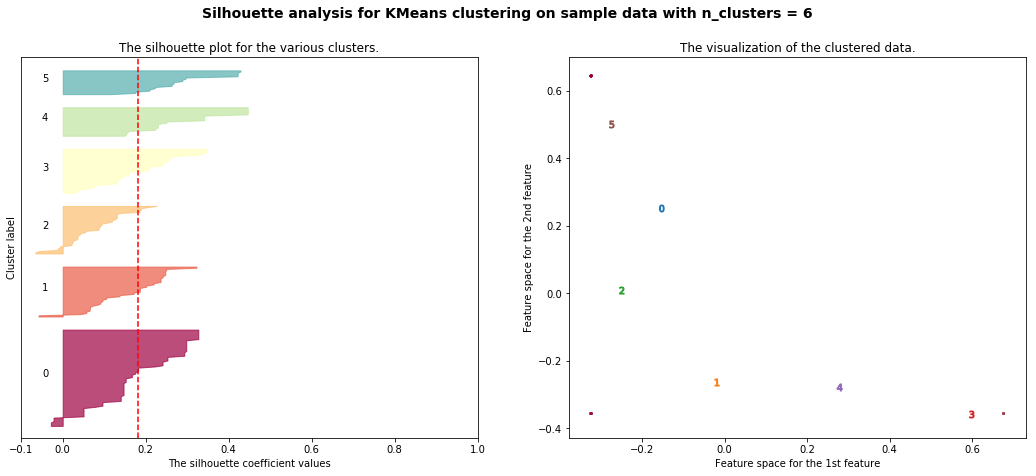

For n_clusters = 7 The average silhouette_score is : 0.19097037711952625


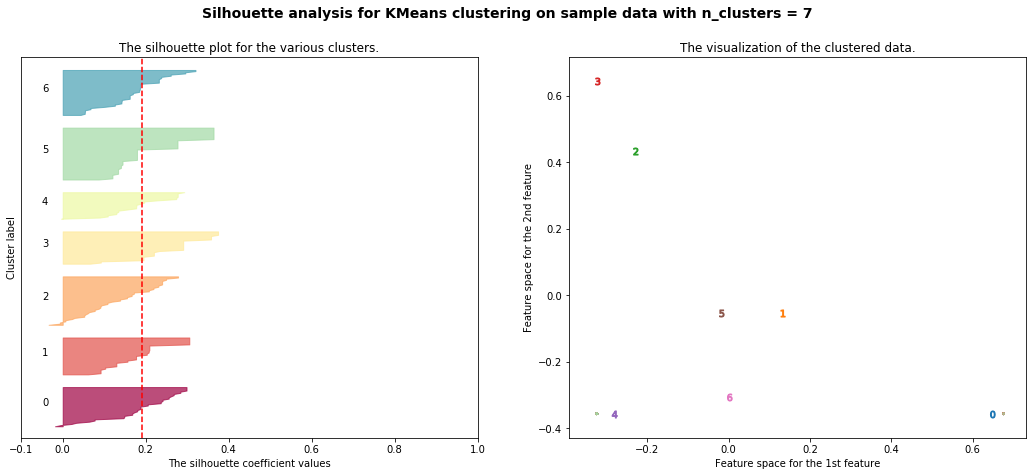

For n_clusters = 8 The average silhouette_score is : 0.20195228123851866


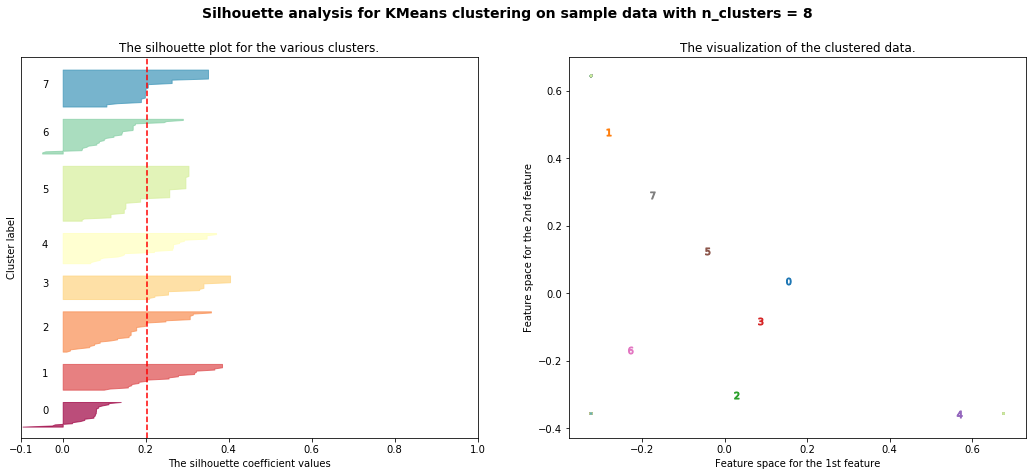

For n_clusters = 9 The average silhouette_score is : 0.19877072553786157


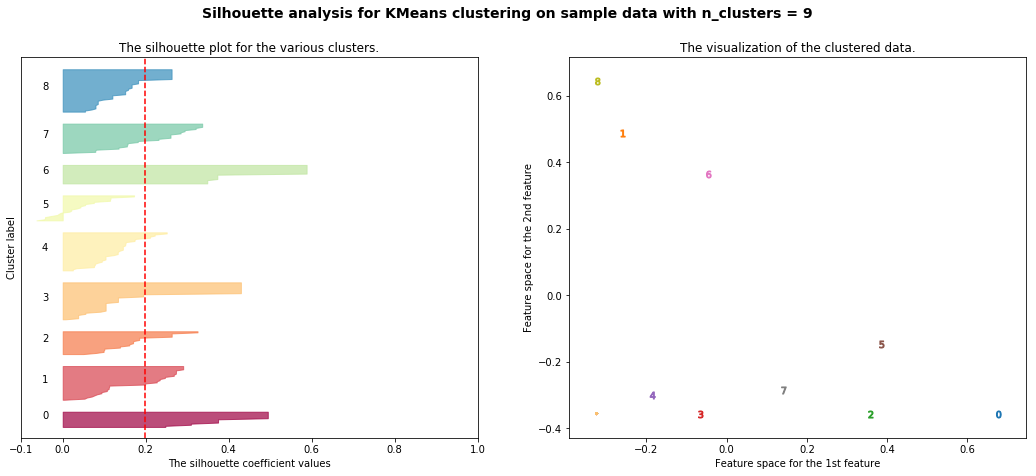

For n_clusters = 10 The average silhouette_score is : 0.20096028098742413


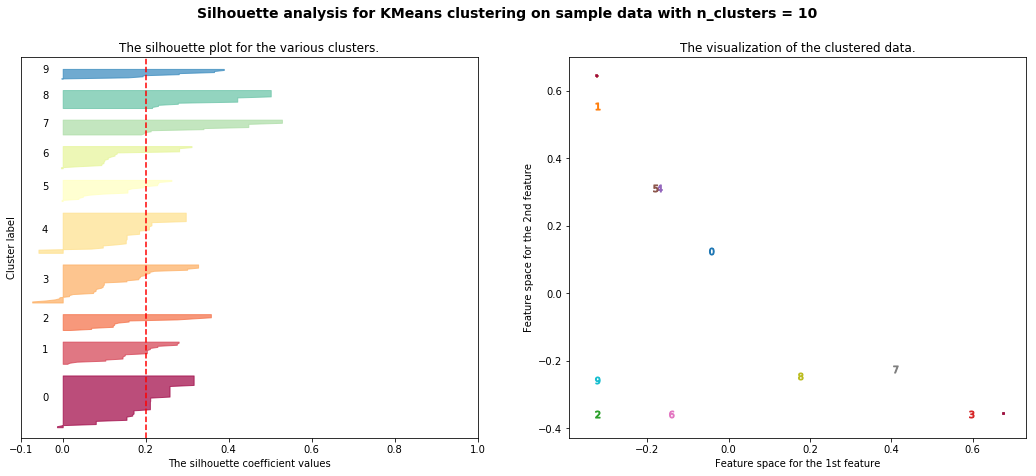

In [765]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs

#= qlty_bankrupcy.values
X= X_centered.values

range_n_clusters = [2 , 3 , 4 , 5 , 6, 7, 8, 9, 10 ]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()